FFR 120  
Felix Waldschock

HW 3 
Exercise 12.4
## Average path length and clustering coef ficient of Erd ős–Rényi random graphs

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


In [413]:
# parameters
n = 50                 # number of nodes

# p is probability between 2 nodes
prob = np.array([0.01, 0.1, 0.4])

In [414]:
def erdos_renyi(n, p):
    # create empty adjacency matrix
    A = np.zeros((n,n))

    # loop over all pairs of nodes
    for i in range(n):
        for j in range(i+1,n):
            # generate random number
            r = np.random.uniform(0,1)

            # if r < p, add edge
            if r < p:
                A[i,j] = 1
                A[j,i] = 1

    return A

In [415]:
# compute the average path length of the graph for each p and plot results. Verify the theoretical approximation for small and large p, as shown in fig 12.5

# implement the theoretical approximation for the average path length of an ER graph with n nodes and probability p

# Formula 12.4
def theoretical_approximation_12_4(n, p):
    gamma = 0.57722
    l = (np.log(n)-gamma) / (np.log(p*(n-1)))
    l += 0.5
    return l

# Formula 12.5
def theoretical_approximation_12_5(p):
    l = 2 - p
    return l

In [416]:
# compute the average path length of matrix A
def computeAveragePathLength(A):
    n = A.shape[0]

    # copy A
    A_copy = np.copy(A)


    # compute the shortest path length between all pairs of nodes
    # initialize matrix with -1
    L = np.ones((n,n)) * (-1)


    # implement a copy of L where the diagonal is =-1 so that the while case can just check that none of the elements are -1
    B = np.copy(L)
    # B set diagonal to 0
    np.fill_diagonal(B, 0)

    # set increment t
    t = 1
    t_max = 50

    # create a History tensor H with 3 dimensions 
    H = np.zeros((n,n,t_max+1))

    while (np.any(B == -1)):
    #for b in range(5):
        for i in range(n):
            for j in range(i,n):

                if A[i,j] != 0:
                    if L[i,j] == L[j,i] == -1:
                        if i != j:
                            # if i != j, set L[i,j] = t+1
                            L[i,j] = t
                            L[j,i] = t
                            #print("Changed L[{},{}] to {}".format(i,j,t))
        # increase power of A
        #A = np.matmul(A,A)
        A = np.dot(A,A_copy)
        # Update counter t
        # print("Updated t to {}".format(t))
        t += 1
        # Update B
        B = np.copy(L)
        np.fill_diagonal(B, 0)
        # print(t)
        # print(B)

        # push L to H
        H[:,:,t-1] = L

        # if t > 10, break
        if t > t_max:
            print("Breaking, t > {}",t_max)
            break
    print("Finished after T = {}".format(t))

    return L,H,A,A_copy

In [417]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # increase the text size
    plt.rcParams.update({'font.size': 20})

    # label the nodes
    for i in range(n):
        ax.text(x[i], y[i], str(i), color='white', ha='center', va='center')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')


    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')


In [418]:
# create the networks for the different probabilities

# init the networks A_
A_ = np.zeros((n,n, len(prob)))

# init the lengths L_  
L_ = np.zeros((n,n, len(prob)))

for i in range(len(prob)):
    A_[:,:,i] = erdos_renyi(n, prob[i])
    L_[:,:,i],_,_,_ = computeAveragePathLength(A_[:,:,i])


Breaking, t > {} 50
Finished after T = 51
Finished after T = 6
Finished after T = 4


In [419]:
# compute the average path length
def getAveragePathLength(L):
    # sum the matrix L and divide by the number of elements minus the diagonal
    n = L.shape[0]
    sum = np.sum(L)
    avg = sum / (n*n - n)
    return avg
    

$ C = \frac{\sum_{i} (A^3)_{ii}}{\sum_{i} k_i(k_i-1)}$ Eq $(12.3)$

In [420]:
# Formula 12.3

def getClusteringCoefficient(A):
    A_2 = np.matmul(A,A)
    A_3 = np.matmul(A_2,A)
    # get the diagonal
    diag = np.diagonal(A_3)
    # get the sum of the diagonal
    sumDiag = np.sum(diag)              # Dimension: (1,1)

    # k_i is the degree of node i 
    k_i = np.sum(A, axis=0)             # Dimension: (n,1)
    # elementwise square of k_i
    k_i_2 = np.square(k_i)              # Dimension: (n,1)
    # sum of k_i_2
    sum_Triples = np.sum(k_i_2 - k_i)   # Dimension: (1,1)

    # get the number of nodes
    n = A.shape[0]

    # compute the clustering coefficient
    C = sumDiag / sum_Triples

    return C

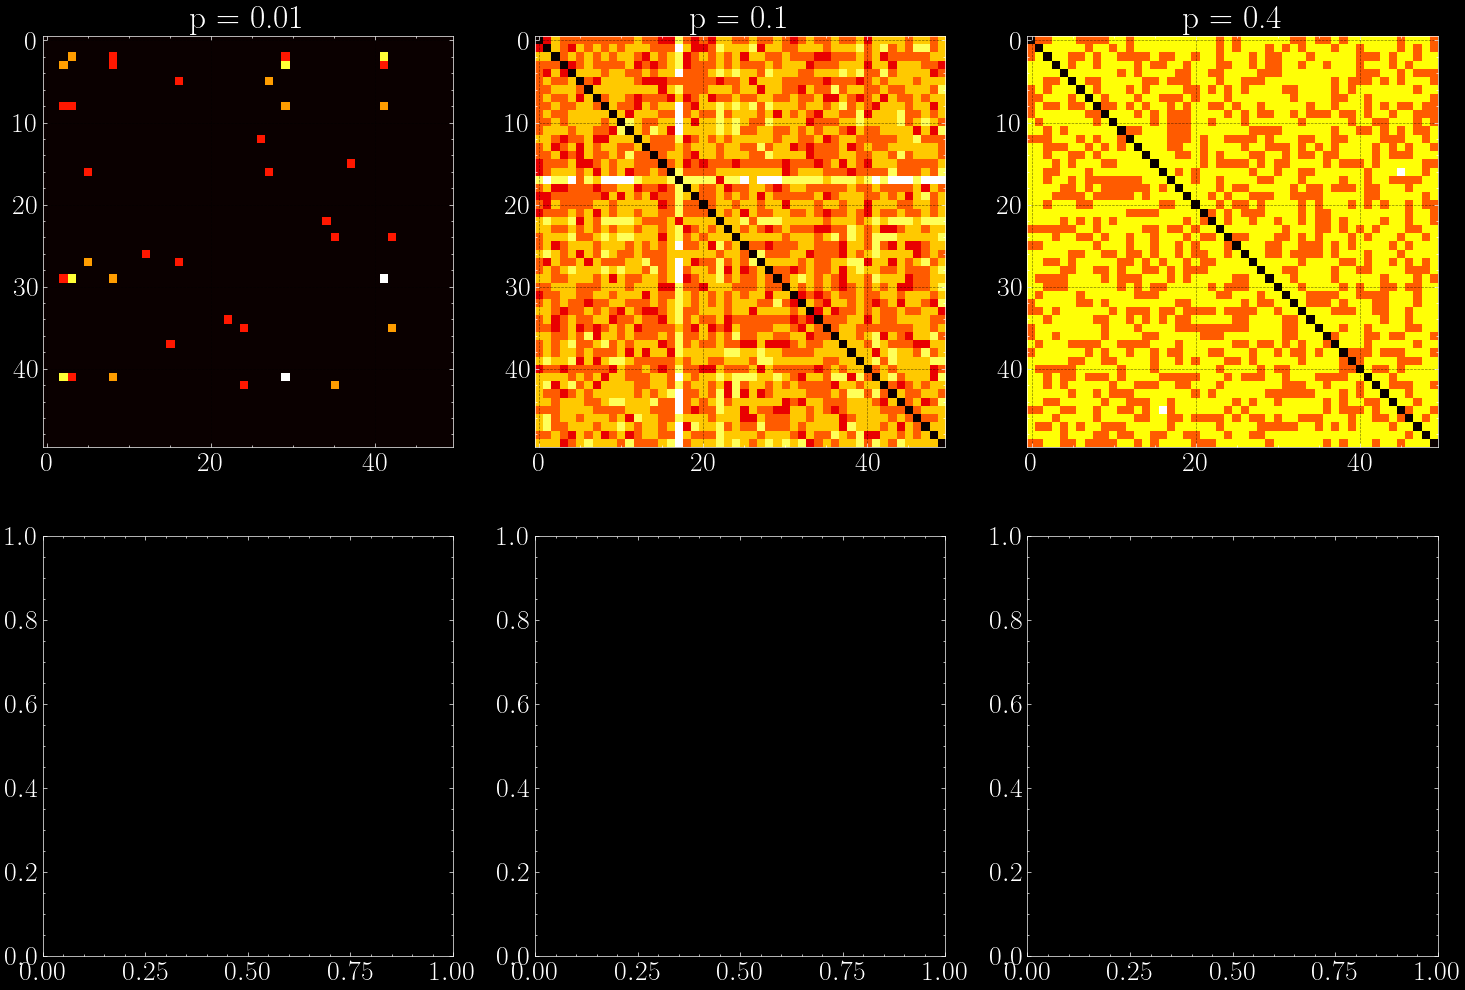

In [421]:

# create a figure with len(probs) subplots
fig, ax = plt.subplots(2,len(prob), figsize=(18,12))


for i in range(len(prob)):
    p = prob[i]
    # plot the length heatmap
    im = ax[0,i].imshow(L_[:,:,i], cmap='hot', interpolation='nearest')
    ax[0,i].set_title("p = {}".format(p))
plt.show()


In [422]:
# compute the average path length for each p
p = np.logspace(-2,0,20)
n = 500

# init the networks A_
A_ = np.zeros((n,n, len(p)))

# init the lengths L_
L_ = np.zeros((n,n, len(p)))

# init the clustering coefficient C
C = np.zeros(len(p))
    
for i in trange(len(p)):
    A_[:,:,i] = erdos_renyi(n, p[i])
    L_[:,:,i],_,_,_ = computeAveragePathLength(A_[:,:,i])
    C[i] = getClusteringCoefficient(A_[:,:,i])



  0%|          | 0/20 [00:00<?, ?it/s]

Breaking, t > {} 50
Finished after T = 51


  5%|▌         | 1/20 [00:04<01:28,  4.68s/it]

Finished after T = 8


 10%|█         | 2/20 [00:06<00:50,  2.83s/it]

Finished after T = 7


 15%|█▌        | 3/20 [00:07<00:36,  2.17s/it]

Finished after T = 6


 20%|██        | 4/20 [00:08<00:29,  1.84s/it]

Finished after T = 5


 25%|██▌       | 5/20 [00:10<00:24,  1.62s/it]

Finished after T = 5


 30%|███       | 6/20 [00:11<00:20,  1.49s/it]

Finished after T = 4


 35%|███▌      | 7/20 [00:12<00:18,  1.39s/it]

Finished after T = 4


 40%|████      | 8/20 [00:13<00:15,  1.33s/it]

Finished after T = 4


 45%|████▌     | 9/20 [00:14<00:14,  1.28s/it]

Finished after T = 4


 50%|█████     | 10/20 [00:16<00:12,  1.26s/it]

Finished after T = 4


 55%|█████▌    | 11/20 [00:17<00:11,  1.24s/it]

Finished after T = 4


 60%|██████    | 12/20 [00:18<00:09,  1.23s/it]

Finished after T = 3


 65%|██████▌   | 13/20 [00:19<00:08,  1.21s/it]

Finished after T = 3


 70%|███████   | 14/20 [00:21<00:07,  1.24s/it]

Finished after T = 3


 75%|███████▌  | 15/20 [00:22<00:06,  1.25s/it]

Finished after T = 3


 80%|████████  | 16/20 [00:23<00:04,  1.23s/it]

Finished after T = 3


 85%|████████▌ | 17/20 [00:24<00:03,  1.24s/it]

Finished after T = 3


 90%|█████████ | 18/20 [00:26<00:02,  1.26s/it]

Finished after T = 3


 95%|█████████▌| 19/20 [00:27<00:01,  1.26s/it]

Finished after T = 2


100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


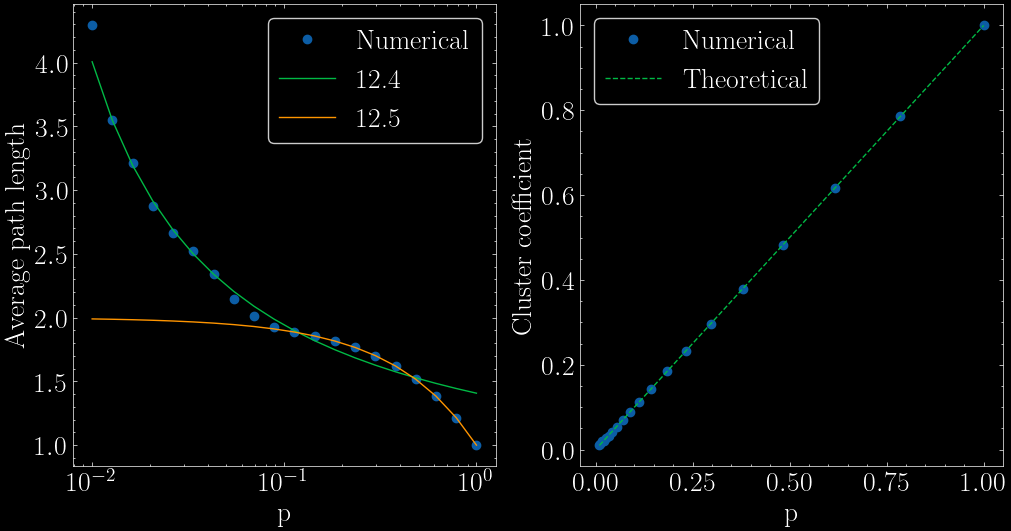

In [423]:
# compute the average path length for each p
avg_path_length = np.zeros(len(p))
for i in range(len(p)):
    avg_path_length[i] = getAveragePathLength(L_[:,:,i])

# plot the average path length
fig, ax = plt.subplots(1,2, figsize=(12,6))

# plot the numerical data
ax[0].semilogx(p, avg_path_length, 'o', label="Numerical")
ax[0].set_xlabel("p")
ax[0].set_ylabel("Average path length")


# plot the theoretical approximation
ax[0].semilogx(p, theoretical_approximation_12_4(n,p), label="12.4")
ax[0].semilogx(p, theoretical_approximation_12_5(p), label="12.5")
ax[0].legend()

# plot the clustering coefficient

ax[1].plot(p, C, 'o', label="Numerical")
ax[1].set_xlabel("p")
ax[1].set_ylabel("Cluster coefficient")

# plot the theoretical approximation which is just p
ax[1].plot(p, p,'--', label="Theoretical")
ax[1].legend()

plt.show()


# TESTING

Breaking, t > {} 50
Finished after T = 51
[[-1.  1. -1.  2.  3.]
 [ 1. -1. -1.  1.  2.]
 [-1. -1. -1. -1. -1.]
 [ 2.  1. -1. -1.  1.]
 [ 3.  2. -1.  1. -1.]]


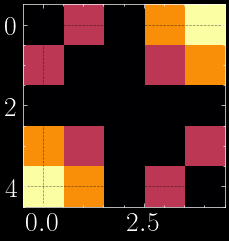

In [424]:
# Artificial test network
A = np.array([[0,1,0,0,0],
              [1,0,0,1,0],
              [0,0,0,0,0],
              [0,1,0,0,1],
              [0,0,0,1,0]])




# compute the average path length of the network
L, H, A_after, A_copy_after = computeAveragePathLength(A)
print(L)
#print(A)

plt.imshow(L, 'inferno')
plt.show()


